### Project 5: Featurisation, Model Selection And Tunning.

### Objective: To build a classifier that can predict whether a person is going to default or not based on their credit history details

In [1]:
# We import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


In [2]:
# We now load our data
df = pd.read_csv('Credit.csv')
df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [3]:
# We find the row and columns of our data set.
df.shape

(1000, 21)

In [4]:
# We find the data types of columns in our dataset.
df.info()
# We found that there are only two data types in our data i.e. object and integer64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [5]:
# We get a glimpse of five point summary of our data
df.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [6]:
# We make a copy of our data
dp = df.copy()

In [7]:
# We separate object data type from our data
dpo = dp.select_dtypes(object)

In [8]:
# We separate integer data type from our data
dpn = dp.select_dtypes(exclude = [object])

In [9]:
# We see glipmse of integer data set
dpn.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
0,0,6,1169,4,4,67,2,1
1,1,48,5951,2,2,22,1,1
2,0,12,2096,2,3,49,1,2
3,0,42,7882,2,4,45,1,2
4,1,24,4870,3,4,53,2,2


In [10]:
# We find the shape of our integer data set
dpn.shape

(1000, 8)

In [11]:
# We find the shape of our object data set
dpo.shape

(1000, 13)

In [12]:
# We see a glimpse of our object data set
dpo.sample(10)

,account_check_status,credit_history,purpose,savings,present_emp_since,personal_status_sex,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker
719,0 <= ... < 200 DM,no credits taken/ all credits paid back duly,car (used),100 <= ... < 500 DM,.. >= 7 years,male : married/widowed,none,"if not A121/A122 : car or other, not in attrib...",bank,own,skilled employee / official,"yes, registered under the customers name",yes
178,no checking account,existing credits paid back duly till now,domestic appliances,... < 100 DM,4 <= ... < 7 years,male : single,none,"if not A121/A122 : car or other, not in attrib...",none,rent,management/ self-employed/ highly qualified em...,"yes, registered under the customers name",yes
64,no checking account,existing credits paid back duly till now,domestic appliances,... < 100 DM,... < 1 year,female : divorced/separated/married,none,if not A121 : building society savings agreeme...,none,own,skilled employee / official,"yes, registered under the customers name",yes
878,< 0 DM,existing credits paid back duly till now,car (new),... < 100 DM,... < 1 year,male : single,none,unknown / no property,none,for free,management/ self-employed/ highly qualified em...,"yes, registered under the customers name",yes
829,0 <= ... < 200 DM,delay in paying off in the past,business,unknown/ no savings account,1 <= ... < 4 years,male : single,none,unknown / no property,none,for free,skilled employee / official,"yes, registered under the customers name",yes
705,no checking account,existing credits paid back duly till now,car (new),500 <= ... < 1000 DM,.. >= 7 years,female : divorced/separated/married,none,unknown / no property,none,for free,skilled employee / official,none,yes
355,0 <= ... < 200 DM,existing credits paid back duly till now,car (new),... < 100 DM,... < 1 year,male : single,none,real estate,stores,own,unskilled - resident,none,yes
843,no checking account,all credits at this bank paid back duly,business,... < 100 DM,4 <= ... < 7 years,male : single,none,"if not A121/A122 : car or other, not in attrib...",bank,own,skilled employee / official,"yes, registered under the customers name",yes
28,0 <= ... < 200 DM,existing credits paid back duly till now,domestic appliances,... < 100 DM,1 <= ... < 4 years,male : single,guarantor,real estate,none,own,skilled employee / official,none,yes
887,0 <= ... < 200 DM,existing credits paid back duly till now,business,... < 100 DM,1 <= ... < 4 years,male : single,none,"if not A121/A122 : car or other, not in attrib...",none,own,skilled employee / official,"yes, registered under the customers name",yes


In [13]:
# We check whether separation is done successfuly
dpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
account_check_status       1000 non-null object
credit_history             1000 non-null object
purpose                    1000 non-null object
savings                    1000 non-null object
present_emp_since          1000 non-null object
personal_status_sex        1000 non-null object
other_debtors              1000 non-null object
property                   1000 non-null object
other_installment_plans    1000 non-null object
housing                    1000 non-null object
job                        1000 non-null object
telephone                  1000 non-null object
foreign_worker             1000 non-null object
dtypes: object(13)
memory usage: 101.6+ KB


In [14]:
# We see whether there is any collinearity amongst the variables
dp.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


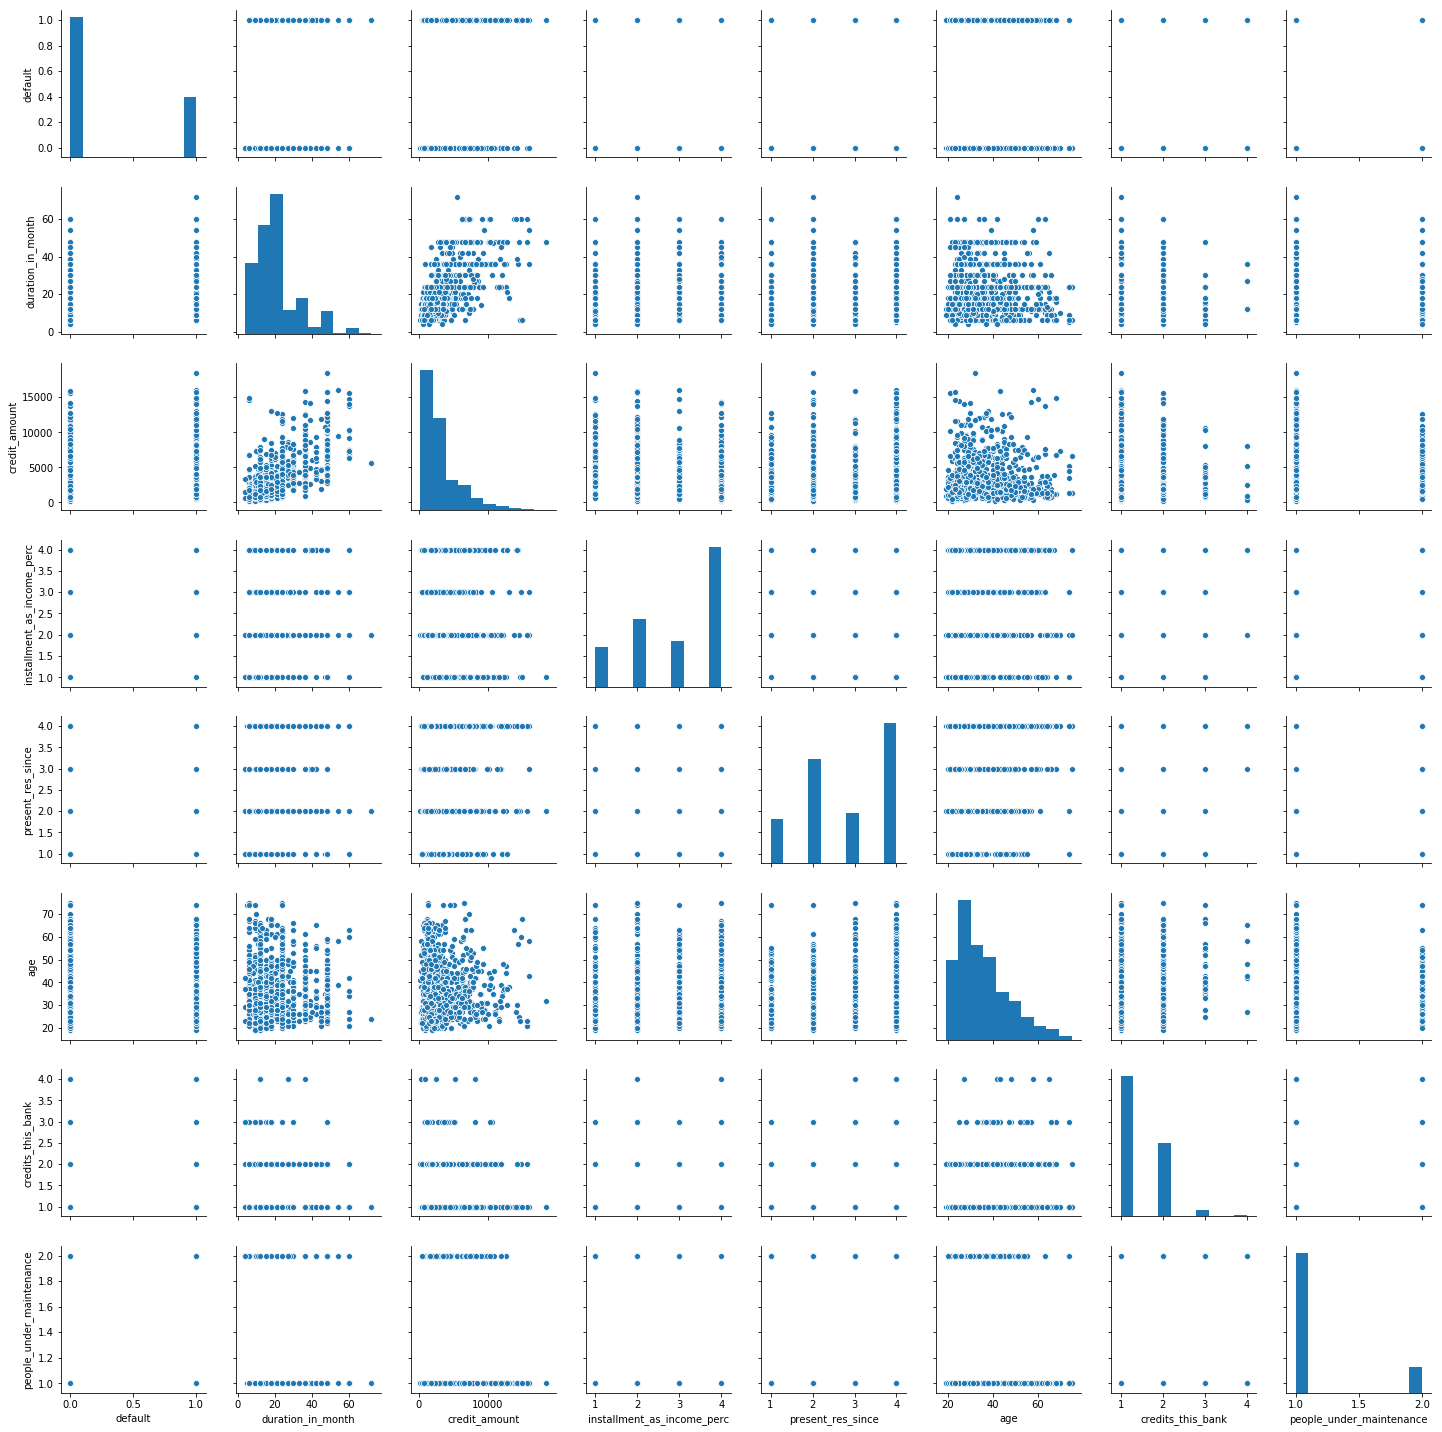

In [15]:
# We try to see from a pairplot perspective the relation that variable hold amongst themselves
sb.pairplot(dp);

We see that attribute 'people_under_maintenance' and 'present_res_since' has hardly got any importance in predicting our target variable. Hence, would drop these attributes.

We also drop column 'foreign_worker', 'other_installment_plans' and 'telephone', as it seems to make no effect to our target variable.

In [16]:
# We see the name of the columns
dpo.columns

Index(['account_check_status', 'credit_history', 'purpose', 'savings',
       'present_emp_since', 'personal_status_sex', 'other_debtors', 'property',
       'other_installment_plans', 'housing', 'job', 'telephone',
       'foreign_worker'],
      dtype='object')

In [17]:
# We drop the mentioned columns from our dpo (object) data set
col = [ 'account_check_status', 'foreign_worker', 'telephone', 'other_installment_plans']
dpo = dpo.drop(col, axis = 1)


In [18]:
# We drop the mentioned colimns from our dpn (integer) data set
colm = ['people_under_maintenance', 'present_res_since']
dpn = dpn.drop(colm, axis = 1)

In [19]:
# We check whether we have dropped successfully
dpo.sample(10)

,credit_history,purpose,savings,present_emp_since,personal_status_sex,other_debtors,property,housing,job
870,delay in paying off in the past,radio/television,500 <= ... < 1000 DM,4 <= ... < 7 years,female : divorced/separated/married,none,"if not A121/A122 : car or other, not in attrib...",own,skilled employee / official
664,critical account/ other credits existing (not ...,(vacation - does not exist?),... < 100 DM,1 <= ... < 4 years,female : divorced/separated/married,none,if not A121 : building society savings agreeme...,own,unskilled - resident
771,critical account/ other credits existing (not ...,(vacation - does not exist?),... < 100 DM,1 <= ... < 4 years,female : divorced/separated/married,none,unknown / no property,own,management/ self-employed/ highly qualified em...
791,existing credits paid back duly till now,car (used),unknown/ no savings account,.. >= 7 years,male : single,none,"if not A121/A122 : car or other, not in attrib...",own,management/ self-employed/ highly qualified em...
207,critical account/ other credits existing (not ...,repairs,... < 100 DM,4 <= ... < 7 years,male : single,none,if not A121 : building society savings agreeme...,own,skilled employee / official
711,all credits at this bank paid back duly,(vacation - does not exist?),... < 100 DM,.. >= 7 years,female : divorced/separated/married,none,unknown / no property,for free,skilled employee / official
20,critical account/ other credits existing (not ...,car (new),... < 100 DM,1 <= ... < 4 years,male : single,none,"if not A121/A122 : car or other, not in attrib...",own,skilled employee / official
242,no credits taken/ all credits paid back duly,car (used),... < 100 DM,.. >= 7 years,male : single,none,unknown / no property,for free,skilled employee / official
175,all credits at this bank paid back duly,car (used),unknown/ no savings account,unemployed,female : divorced/separated/married,none,real estate,own,management/ self-employed/ highly qualified em...
759,critical account/ other credits existing (not ...,car (new),... < 100 DM,.. >= 7 years,male : single,none,if not A121 : building society savings agreeme...,own,skilled employee / official


In [20]:
# We now form new columns using get dummies and we drop first columns as these are categorical data
# Hence, we would be needing to convert it to quantitative data
dpm = pd.get_dummies(dpo, drop_first= True)

In [21]:
# We check whether we have successfully changes categorical variables to numerical using get dummies
dpm.head()

,credit_history_critical account/ other credits existing (not at this bank),credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/ all credits paid back duly,purpose_business,purpose_car (new),purpose_car (used),purpose_domestic appliances,purpose_education,purpose_furniture/equipment,...,other_debtors_guarantor,other_debtors_none,"property_if not A121/A122 : car or other, not in attribute 6",property_real estate,property_unknown / no property,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,1,0,1,0,0
1,0,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [22]:
# We try to see the frequency of the instances in each column
dpm.sum()

credit_history_critical account/ other credits existing (not at this bank)    293
credit_history_delay in paying off in the past                                 88
credit_history_existing credits paid back duly till now                       530
credit_history_no credits taken/ all credits paid back duly                    40
purpose_business                                                               97
purpose_car (new)                                                             234
purpose_car (used)                                                            103
purpose_domestic appliances                                                   280
purpose_education                                                              22
purpose_furniture/equipment                                                    12
purpose_radio/television                                                      181
purpose_repairs                                                                12
purpose_retraini

In [23]:
# We see the shape of our new Quantitative data set (which was object data type)
dpm.shape

(1000, 34)

In [24]:
dpn.shape

(1000, 6)

In [25]:
# We saw that there are many outliers in the data set. 
# Hence, now we deal with the outliers now by using the capping method.
# So we replace the outliers which are more than two times standard deviation from mean with
# value of mean plus two times the standard deviation. Hope this will sound reasonable.
# First we cap the upper limit and in second loop we cap the lower limit in our code below
column = list(dpn.columns)
for i in column:
    a = dpn[i].mean()
    b = dpn[i].std()
    dpn[i] = dpn[i][ dpn[i] < (a + 2 * b)]
    dpn[i] = dpn[i].fillna(a + 2 * b)
    dpn[i] = dpn[i][dpn[i] > (a - 2 * b)]
    dpn[i] = dpn[i].fillna(a - 2 * b)

In [26]:
# We check whether our outlier cleaning issue is treated 
dpn.describe()
# And yes is dealt with correctly with the above code as per our desired strategy.

,default,duration_in_month,credit_amount,installment_as_income_perc,age,credits_this_bank
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.518341,3115.583246,2.973000,35.206035,1.386119
std,0.458487,11.065887,2338.050811,1.118715,10.518962,0.516882
min,0.000000,4.000000,250.000000,1.000000,19.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,27.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,33.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,42.000000,2.000000
max,1.000000,45.020629,8916.731752,4.000000,58.296937,2.562309


In [27]:
# We now join the two well cleaned data set using concat function
dp_new = pd.concat([dpn, dpm], axis = 1)

In [28]:
# We check that our data is joined correctly
dp_new.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,age,credits_this_bank,credit_history_critical account/ other credits existing (not at this bank),credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/ all credits paid back duly,...,other_debtors_guarantor,other_debtors_none,"property_if not A121/A122 : car or other, not in attribute 6",property_real estate,property_unknown / no property,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident
0,0,6.000000,1169.0,4,58.296937,2.0,1,0,0,0,...,0,1,0,1,0,1,0,1,0,0
1,1,45.020629,5951.0,2,22.000000,1.0,0,0,1,0,...,0,1,0,1,0,1,0,1,0,0
2,0,12.000000,2096.0,2,49.000000,1.0,1,0,0,0,...,0,1,0,1,0,1,0,0,0,1
3,0,42.000000,7882.0,2,45.000000,1.0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,1,24.000000,4870.0,3,53.000000,2.0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [29]:
# We see a five point summary of our data set
dp_new.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,age,credits_this_bank,credit_history_critical account/ other credits existing (not at this bank),credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/ all credits paid back duly,...,other_debtors_guarantor,other_debtors_none,"property_if not A121/A122 : car or other, not in attribute 6",property_real estate,property_unknown / no property,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000
mean,0.300000,20.518341,3115.583246,2.973000,35.206035,1.386119,0.293000,0.088000,0.530000,0.040000,...,0.052000,0.907000,0.332000,0.282000,0.154000,0.713000,0.179000,0.630000,0.022000,0.2000
std,0.458487,11.065887,2338.050811,1.118715,10.518962,0.516882,0.455366,0.283437,0.499349,0.196057,...,0.222138,0.290578,0.471167,0.450198,0.361129,0.452588,0.383544,0.483046,0.146757,0.4002
min,0.000000,4.000000,250.000000,1.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,0.000000,12.000000,1365.500000,2.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
50%,0.000000,18.000000,2319.500000,3.000000,33.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0000
75%,1.000000,24.000000,3972.250000,4.000000,42.000000,2.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0000
max,1.000000,45.020629,8916.731752,4.000000,58.296937,2.562309,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000


In [30]:
# We check if by running above code whether we have got any NA values in our data set
dp_new.isna().sum()
# Hence, our data is free from NA values issue

default                                                                       0
duration_in_month                                                             0
credit_amount                                                                 0
installment_as_income_perc                                                    0
age                                                                           0
credits_this_bank                                                             0
credit_history_critical account/ other credits existing (not at this bank)    0
credit_history_delay in paying off in the past                                0
credit_history_existing credits paid back duly till now                       0
credit_history_no credits taken/ all credits paid back duly                   0
purpose_business                                                              0
purpose_car (new)                                                             0
purpose_car (used)                      

In [31]:
#now we separate our target variable and independant variables from our data set.
X = dp_new.drop('default', axis = 1)
Y = dp_new['default']

In [32]:
# we now apply scaling to our independant variables
from sklearn.preprocessing import scale
X = X.apply(scale)

In [33]:
# We check whether we have applied scaling correctly
X.head()

,duration_in_month,credit_amount,installment_as_income_perc,age,credits_this_bank,credit_history_critical account/ other credits existing (not at this bank),credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/ all credits paid back duly,purpose_business,...,other_debtors_guarantor,other_debtors_none,"property_if not A121/A122 : car or other, not in attribute 6",property_real estate,property_unknown / no property,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident
0,-1.312647,-0.832983,0.918477,2.196268,1.188257,1.553374,-0.31063,-1.061913,-0.204124,-0.327749,...,-0.234206,0.320212,-0.704987,1.595650,-0.426653,0.634448,-0.466933,0.766356,-0.149983,-0.5
1,2.215326,1.213334,-0.870183,-1.256079,-0.747388,-0.643760,-0.31063,0.941697,-0.204124,-0.327749,...,-0.234206,0.320212,-0.704987,1.595650,-0.426653,0.634448,-0.466933,0.766356,-0.149983,-0.5
2,-0.770169,-0.436301,-0.870183,1.311999,-0.747388,1.553374,-0.31063,-1.061913,-0.204124,-0.327749,...,-0.234206,0.320212,-0.704987,1.595650,-0.426653,0.634448,-0.466933,-1.304877,-0.149983,2.0
3,1.942222,2.039648,-0.870183,0.931543,-0.747388,-0.643760,-0.31063,0.941697,-0.204124,-0.327749,...,4.269750,-3.122929,-0.704987,-0.626704,-0.426653,-1.576173,-0.466933,0.766356,-0.149983,-0.5
4,0.314787,0.750751,0.024147,1.692455,1.188257,-0.643760,3.21926,-1.061913,-0.204124,-0.327749,...,-0.234206,0.320212,-0.704987,-0.626704,2.343823,-1.576173,-0.466933,0.766356,-0.149983,-0.5


In [34]:
# We see if there is any colliniarity amongst the variables
X.corr()
# We saw that there is hardly any excep 'credit_amount' and 'duration_in_month'. 
# But these both variables are needed in our model, hence, we keep them.

,duration_in_month,credit_amount,installment_as_income_perc,age,credits_this_bank,credit_history_critical account/ other credits existing (not at this bank),credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/ all credits paid back duly,purpose_business,...,other_debtors_guarantor,other_debtors_none,"property_if not A121/A122 : car or other, not in attribute 6",property_real estate,property_unknown / no property,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident
duration_in_month,1.000000,0.642592,0.087471,-0.032003,0.007254,-0.068861,0.136140,-0.074653,1.178623e-01,0.166509,...,-0.037428,0.008126,0.135801,-0.252566,0.200328,-0.071120,-0.063122,0.062793,-0.044616,-0.187956
credit_amount,0.642592,1.000000,-0.289975,0.027215,0.041010,-0.033477,0.131749,-0.096220,1.285297e-01,0.107066,...,-0.063159,-0.000095,0.085548,-0.260954,0.244563,-0.123901,-0.019466,-0.072239,-0.040224,-0.171778
installment_as_income_perc,0.087471,-0.289975,1.000000,0.069299,0.020862,0.041089,-0.014597,-0.020947,-5.440121e-02,-0.025326,...,-0.006429,0.013823,0.017023,-0.034555,0.044990,0.049922,-0.091373,0.042623,-0.087834,-0.057237
age,-0.032003,0.027215,0.069299,1.000000,0.132864,0.166861,0.021842,-0.163580,-1.890272e-02,-0.007362,...,-0.022756,0.029793,-0.144436,0.004616,0.208521,0.011099,-0.219502,-0.140873,0.039523,0.049878
credits_this_bank,0.007254,0.041010,0.020862,0.132864,1.000000,0.527037,0.161140,-0.578906,1.252493e-01,0.087365,...,-0.021933,0.015640,0.013593,-0.000056,-0.015894,0.049234,-0.059914,0.010994,0.043771,-0.011070
credit_history_critical account/ other credits existing (not at this bank),-0.068861,-0.033477,0.041089,0.166861,0.527037,1.000000,-0.199971,-0.683617,-1.314070e-01,-0.069940,...,-0.032023,0.017014,-0.033946,0.031123,-0.000743,0.083011,-0.088532,0.001866,0.023277,-0.003296
credit_history_delay in paying off in the past,0.136140,0.131749,-0.014597,0.021842,0.161140,-0.199971,1.000000,-0.329862,-6.340716e-02,0.172512,...,-0.072751,0.087314,0.013372,-0.045625,0.014161,0.017604,-0.043756,-0.003217,-0.046589,-0.022944
credit_history_existing credits paid back duly till now,-0.074653,-0.096220,-0.020947,-0.163580,-0.578906,-0.683617,-0.329862,1.000000,-2.167621e-01,-0.124634,...,0.058116,-0.060088,0.012934,0.038026,-0.058951,-0.043805,0.084304,0.017015,-0.022675,0.010018
credit_history_no credits taken/ all credits paid back duly,0.117862,0.128530,-0.054401,-0.018903,0.125249,-0.131407,-0.063407,-0.216762,1.000000e+00,0.191739,...,-0.024823,0.047792,0.040311,-0.071221,0.026014,-0.039709,0.037805,0.029595,0.004175,-0.025516
purpose_business,0.166509,0.107066,-0.025326,-0.007362,0.087365,-0.069940,0.172512,-0.124634,1.917385e-01,1.000000,...,-0.046324,0.058414,0.020061,0.019869,-0.036864,0.051083,-0.012013,-0.007768,-0.003087,0.005068


In [35]:
# We import necessary libraries for splitting our data and also we split in ratio of 70:30
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state = 7)



In [36]:
# We check our train data set
x_train.head()

,duration_in_month,credit_amount,installment_as_income_perc,age,credits_this_bank,credit_history_critical account/ other credits existing (not at this bank),credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/ all credits paid back duly,purpose_business,...,other_debtors_guarantor,other_debtors_none,"property_if not A121/A122 : car or other, not in attribute 6",property_real estate,property_unknown / no property,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident
528,1.399744,-0.348149,0.918477,-0.400053,-0.747388,-0.643760,-0.31063,0.941697,-0.204124,-0.327749,...,-0.234206,0.320212,1.418467,-0.626704,-0.426653,-1.576173,2.141633,0.766356,-0.149983,-0.5
925,-0.770169,-1.034962,0.918477,1.026657,1.188257,-0.643760,-0.31063,-1.061913,-0.204124,-0.327749,...,-0.234206,0.320212,1.418467,-0.626704,-0.426653,0.634448,-0.466933,0.766356,-0.149983,-0.5
296,-0.770169,0.667307,-1.764514,-1.446307,-0.747388,-0.643760,-0.31063,0.941697,-0.204124,-0.327749,...,-0.234206,0.320212,1.418467,-0.626704,-0.426653,-1.576173,2.141633,0.766356,-0.149983,-0.5
603,1.399744,0.099884,0.918477,-0.685395,-0.747388,-0.643760,-0.31063,0.941697,-0.204124,-0.327749,...,-0.234206,0.320212,1.418467,-0.626704,-0.426653,0.634448,-0.466933,-1.304877,-0.149983,-0.5
138,-0.498930,-0.165855,0.918477,-0.019597,2.276687,1.553374,-0.31063,-1.061913,-0.204124,-0.327749,...,4.269750,-3.122929,-0.704987,1.595650,-0.426653,0.634448,-0.466933,0.766356,-0.149983,-0.5


In [37]:
# Since, we are using Random forest Classifier.
# We import neccessary libraries and built the model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf = clf.fit(x_train, y_train)

pred = clf.predict(x_train)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
# We check the accuracy in our training data prediction using our built model
accuracy_score(y_train, pred)

1.0

In [40]:
# We now see accuracy in test data
pred_test =  clf.predict(x_test)
accuracy_score(y_test, pred_test)
# Accuracy of 74% is good but we need a robut model hence, we work further using GridSearch and Cross Validation.

0.756

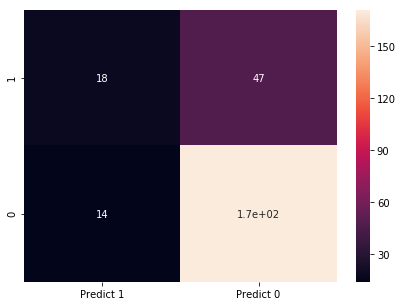

In [41]:
# We represent the accuracy with confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_test, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sb.heatmap(df_cm, annot=True);

In [42]:
# We try to plot Graph to see the importace of each variable.
from sklearn.datasets import load_iris

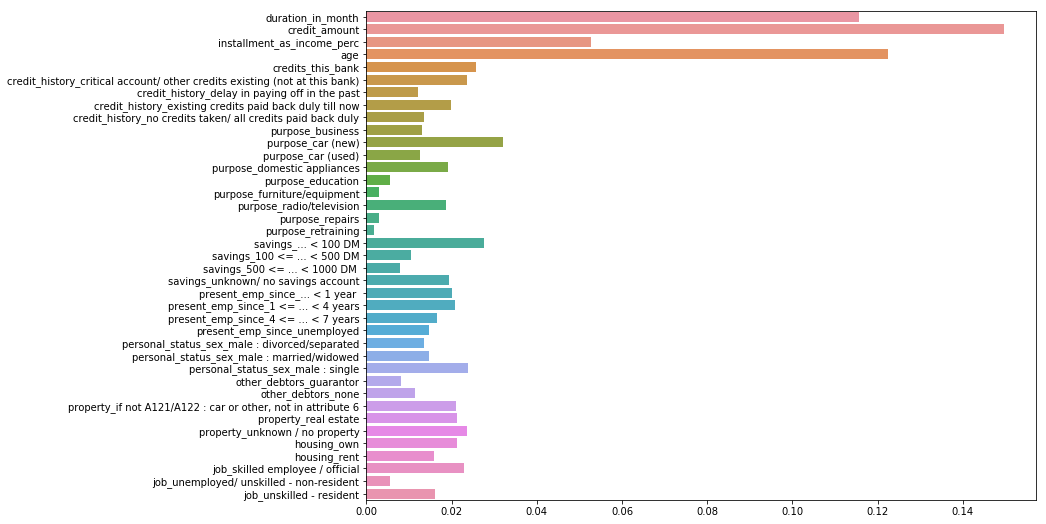

In [43]:
plt.figure(figsize=[12, 9])
sb.barplot(clf.feature_importances_, X.columns);

In [44]:
# We take a glimpse of the parameters of our model
clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
# We creat Grid of Parameters for feeding into Gridsearch CV
param_grid = {'n_estimators': [600, 900],'criterion': ['gini'],
 'max_depth': [None],
 'max_features': ['auto'],
 'min_samples_leaf': [2], 'random_state': [7]}

In [46]:
# We import neccessary libraries for applying Grid search Algorithm
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(clf, param_grid, cv= 10)


In [47]:
# We now fit to our training data set
gs = gs.fit(x_train, y_train)

In [48]:
# We get the best parameters as below
gs.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'n_estimators': 600,
 'random_state': 7}

In [49]:
# And the best score as below
gs.best_score_

0.7266666666666667

In [50]:
# We now again built our model with best parameter
clf = RandomForestClassifier(criterion= 'gini',
 max_depth= None,
 max_features = 'auto',
 min_samples_leaf = 2,
 n_estimators = 900,
 random_state = 7)

In [51]:
# We now fit our model to train data set and get the accuracy score
clf = clf.fit(x_train, y_train)
pred2 = clf.predict(x_train)
accuracy_score(y_train, pred2)

0.952

In [52]:
# We get the accuracy score for test data
pred_test = clf.predict(x_test)
accuracy_score(y_test, pred_test)
# As the score looks quite improved

0.784

In [53]:
# Now since we have foudn our best parameters, hence we apply them with KFold Validation and see how it performs.
# We import neccessary libraries
from sklearn.model_selection import KFold, cross_val_score

In [54]:
# We keep the number of fold as 10 and random state as same i.e. 7
n_folds = 10
seed = 7
Kfold = KFold(n_splits= n_folds, random_state= seed, shuffle= True)

In [55]:
# We now built the model with best parameters
model = RandomForestClassifier(criterion= 'gini',
 max_depth= None,
 max_features = 'auto',
 min_samples_leaf = 2,
 n_estimators = 900,
 random_state = 7)

In [56]:
# We apply the model to cross validation Algorithm
results = cross_val_score(model, X, Y, cv= Kfold)

In [77]:
# Hence, we see our accuracy of the above Cross Validated model as below
print(results)
print(results.mean() * 100, results.std() * 100)

[0.83 0.76 0.72 0.71 0.68 0.73 0.7  0.76 0.71 0.76]
73.6 4.079215610874227


In [58]:
data = {'Model_Name': ['RandomForestClassifier_Without_Tuning', 'RandomForestClassifier_With_Best_Para', 'RandomForestClassifier_Cross_Validated'], 'Accuracy': [75.60, 78.40, 73.60]}

In [59]:
Comparision = pd.DataFrame(data)

In [60]:
Comparision

,Model_Name,Accuracy
0,RandomForestClassifier_Without_Tuning,75.6
1,RandomForestClassifier_With_Best_Para,78.4
2,RandomForestClassifier_Cross_Validated,73.6


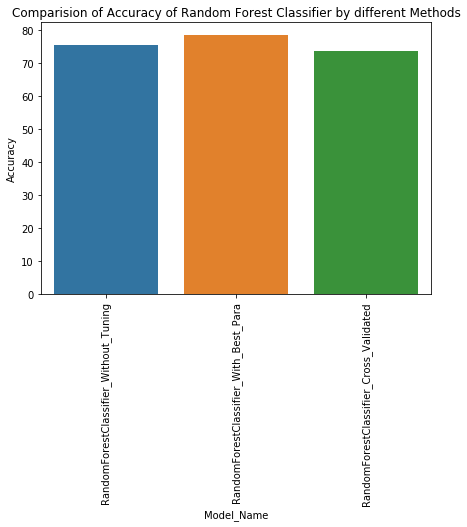

In [76]:
plt.figure(figsize=[7, 5])
sb.barplot(Comparision['Model_Name'], Comparision['Accuracy'])
plt.xticks(rotation = 90)
plt.title('Comparision of Accuracy of Random Forest Classifier by different Methods');

### Conclusion:

#### 1. Variables i.e. Credit_Amount, Age And Duration in Months are the top three Variables which are having highest importance in predicting our dependent variable. 

#### 2. It is evident that RandomForestClassifier does prediction in classifying the defaulters well enough and hence, with Cross Validated with Best Parameters it is showing Accuracy of 73.60% with 4.00% Standard Deviation (That Means the accuracy in Production is likely to show between 69.60% to 77.60%). Although, the Random Forest Classifier Model with Best Parameter is showing 78.40% of Accuracy in test Data which is more than the above. But, we cannot say it as conclusive because it is not as robust as Cross Validated Model. Hence, we can conclude that our accuracy stands with 73.60% with 4.00% Stadard Deviation with our Random Forest Classifier Model with Best Parameter and Cross Validated with n_fold as 10 and random state as 7.

============================================================================================================